In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [35]:
# 自作関数の呼び出し
import sys
sys.path.append("../")    # <- 親フォルダから呼び出すためにpathを追加する。
from my_package.excute_notebook import execute_notebook

In [36]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

### <font color="orange">make_data.ipynbの実行</font>

In [37]:
import os

file_path = "../1_datasets/1_make_dataset/tmp_data_folder/3_main_data/train_data.csv"

if os.path.exists(file_path):
    print("既にデータが保存されています。")
else:
    print("make_data.ipynbを実行します。")
    notebook_path = "../1_datasets/1_make_dataset/make_data.ipynb"
    execute_notebook(notebook_path=notebook_path)
    print("実行が完了しました。")

既にデータが保存されています。


### <font color="orange">データの読み込み</font>

In [38]:
df = pd.read_csv("../1_datasets/1_make_dataset/tmp_data_folder/3_main_data/train_data.csv")
df_value = df.select_dtypes(include=[int, float])
df_object = df.select_dtypes(include="object")

In [39]:
df.head()

,review_score,order_status,count_payment_sequential,payment_type_credit_card,payment_type_boleto,payment_type_voucher,payment_type_debit_card,mean_credit_card_payment_installments,payment_value,seller_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume,days_approved_deliverd,days_estimated_deliverd
0,4.0,delivered,3,1,0,1,0,1,38.71,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,40,268,4,500,1976,8,-8
1,4.0,delivered,1,0,1,0,0,0,141.46,289cdb325fb7e7f891c38608bf9e0962,perfumery,29,178,1,400,4693,12,-6
2,5.0,delivered,1,1,0,0,0,3,179.12,4869f7a5dfa277a7dca6462dcf3b52b2,auto,46,232,1,420,9576,9,-18
3,5.0,delivered,1,1,0,0,0,1,72.20,66922902710d126a0e7d26b0e3805106,pet_shop,59,468,3,450,6000,13,-13
4,5.0,delivered,1,1,0,0,0,1,28.62,2c9e548be18521d1c43cde1c582c6de8,stationery,38,316,4,250,11475,2,-10


In [40]:
df.isna().sum()

review_score                             0
order_status                             0
count_payment_sequential                 0
payment_type_credit_card                 0
payment_type_boleto                      0
payment_type_voucher                     0
payment_type_debit_card                  0
mean_credit_card_payment_installments    0
payment_value                            0
seller_id                                0
product_category_name_english            0
product_name_lenght                      0
product_description_lenght               0
product_photos_qty                       0
product_weight_g                         0
product_volume                           0
days_approved_deliverd                   0
days_estimated_deliverd                  0
dtype: int64

In [41]:
df.dtypes

review_score                             float64
order_status                              object
count_payment_sequential                   int64
payment_type_credit_card                   int64
payment_type_boleto                        int64
payment_type_voucher                       int64
payment_type_debit_card                    int64
mean_credit_card_payment_installments      int64
payment_value                            float64
seller_id                                 object
product_category_name_english             object
product_name_lenght                        int64
product_description_lenght                 int64
product_photos_qty                         int64
product_weight_g                           int64
product_volume                             int64
days_approved_deliverd                     int64
days_estimated_deliverd                    int64
dtype: object

In [42]:
df_value.describe().T

,count,mean,std,min,25%,50%,75%,max
review_score,102314.0,4.059493,1.368207,1.00,4.0,5.00,5.0000,5.00
count_payment_sequential,102314.0,1.045136,0.386776,1.00,1.0,1.00,1.0000,29.00
payment_type_credit_card,102314.0,0.770227,0.420689,0.00,1.0,1.00,1.0000,1.00
payment_type_boleto,102314.0,0.198292,0.398715,0.00,0.0,0.00,0.0000,1.00
payment_type_voucher,102314.0,0.038685,0.192844,0.00,0.0,0.00,0.0000,1.00
payment_type_debit_card,102314.0,0.015452,0.123344,0.00,0.0,0.00,0.0000,1.00
mean_credit_card_payment_installments,102314.0,2.737954,2.938451,0.00,1.0,2.00,4.0000,24.00
payment_value,102314.0,164.406081,223.231367,9.59,63.1,107.78,181.9275,13664.08
product_name_lenght,102314.0,47.822018,12.167167,0.00,42.0,51.00,57.0000,76.00
product_description_lenght,102314.0,770.407403,653.645792,0.00,339.0,592.00,974.0000,3992.00


In [43]:
# カテゴリ変数のunique数
for i in df_object:
    print(f"{i} : {df[i].nunique()}")

order_status : 8
seller_id : 3091
product_category_name_english : 72


In [44]:
# import warnings

# # 警告を一時的に非表示にする
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore", category=FutureWarning)
    
#     sns.pairplot(data=df_value, hue="review_score")

#! 処理が長いのでコメントアウト

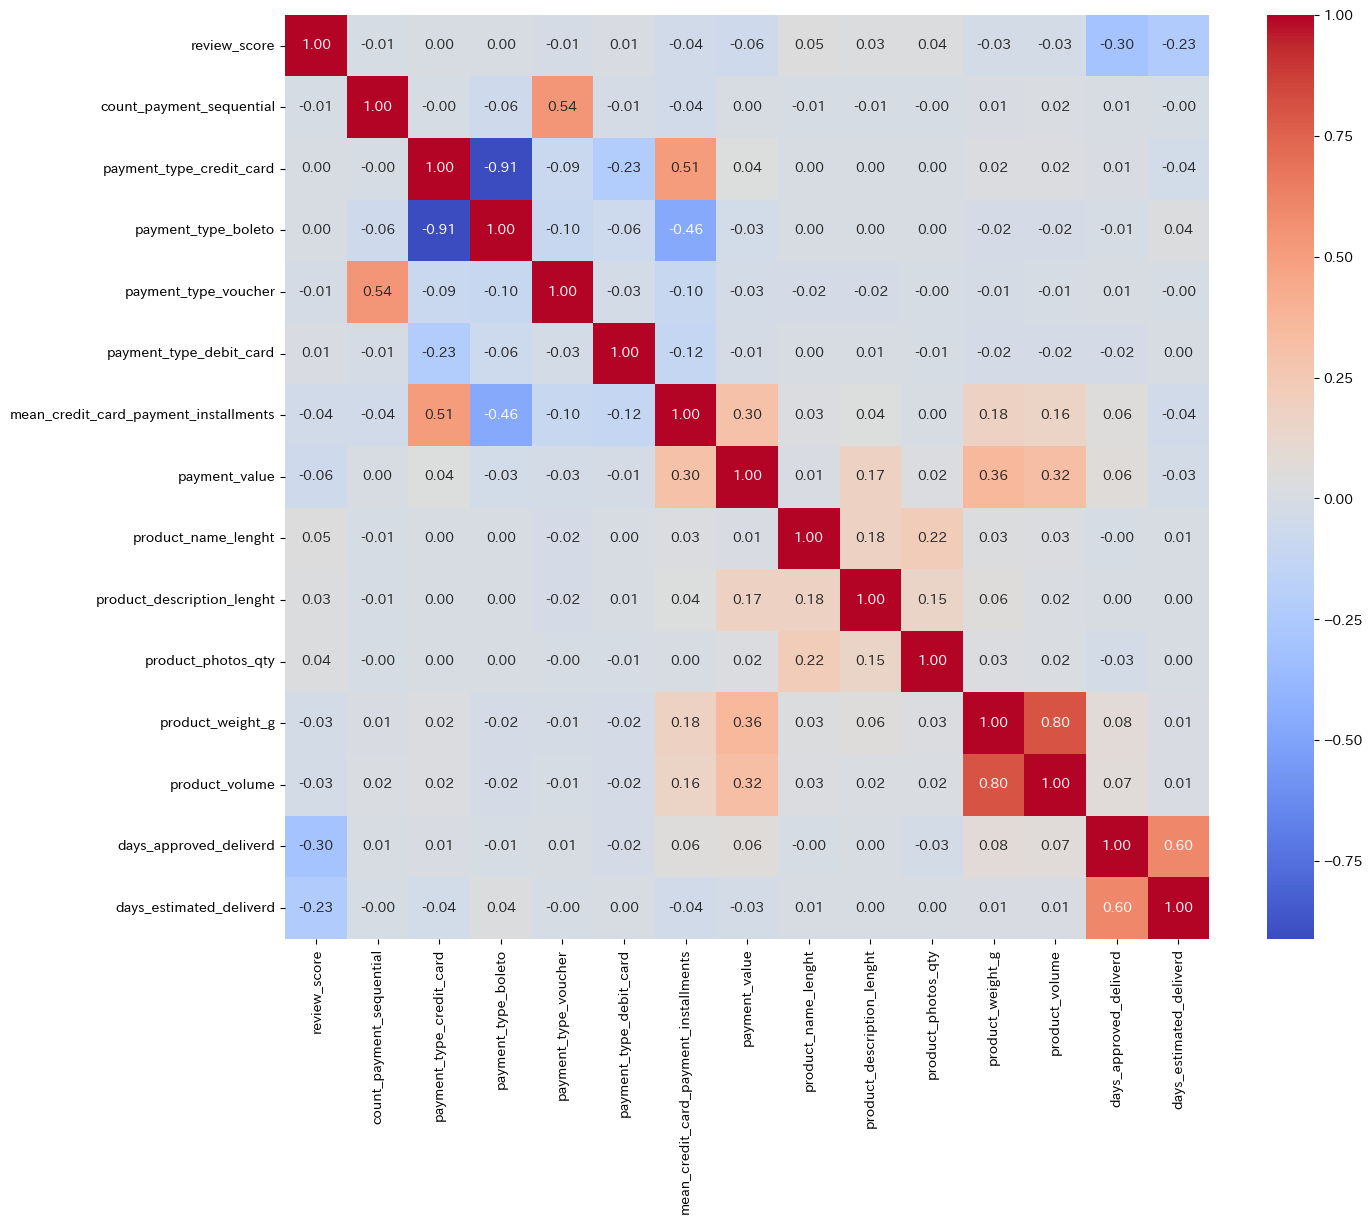

In [45]:
plt.figure(figsize=(15,12))
sns.heatmap(data=df_value.corr(), fmt=".2f", annot=True, cmap='coolwarm', square=True)
plt.show()

In [46]:
import ydata_profiling as ypro
import os

if os.path.exists("./data_value_report.html"):
    print("既にフォルダに保存してあります。")
    pass
else:
    profile = ypro.ProfileReport(df.select_dtypes(include=[int, float]))
    
    # HTMLレポートを保存
    profile.to_file("./data_value_report.html")
    print("htmlレポートを保存しました。")


既にフォルダに保存してあります。


In [47]:
if os.path.exists("./data_object_report.html"):
    print("既にフォルダに保存してあります。")
    pass
else:
    profile = ypro.ProfileReport(df.select_dtypes(include=object))
    # HTMLレポートを保存
    profile.to_file("./data_object_report.html")
    print("htmlレポートを保存しました。")

既にフォルダに保存してあります。
